<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-06-25-Optimizer/April_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

In [ ]:
! unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Churn_Modelling.csv     


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
y=dataset['Exited']

In [ ]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#ANN MODEL

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow import keras

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu',kernel_initializer=initializers.HeUniform()))
model.add(Dense(units=8, activation='relu',kernel_initializer=initializers.GlorotUniform()))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.20)

Epoch 1/50
168/168 [==============================] - 2s 3ms/step - loss: 0.1884 - accuracy: 0.9299 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 2/50
168/168 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/50
168/168 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 7.2158e-04 - val_accuracy: 1.0000
Epoch 4/50
168/168 [==============================] - 0s 2ms/step - loss: 4.8551e-04 - accuracy: 1.0000 - val_loss: 3.9113e-04 - val_accuracy: 1.0000
Epoch 5/50
168/168 [==============================] - 0s 3ms/step - loss: 2.7810e-04 - accuracy: 1.0000 - val_loss: 2.4409e-04 - val_accuracy: 1.0000
Epoch 6/50
168/168 [==============================] - 0s 3ms/step - loss: 1.7941e-04 - accuracy: 1.0000 - val_loss: 1.6689e-04 - val_accuracy: 1.0000
Epoch 7/50
168/168 [==============================] - 0s 3ms/step - loss: 1.2454e-04 - accuracy: 1.0000 - val_loss: 1.20

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


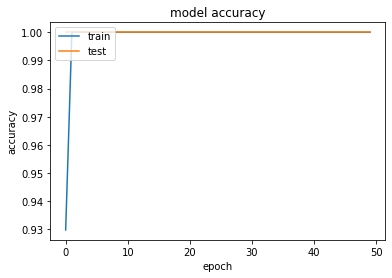

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

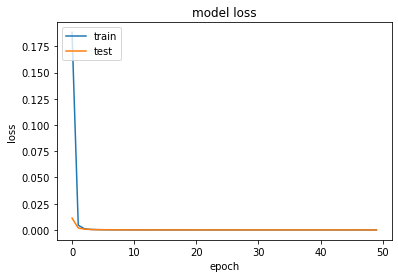

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [ ]:
cm

array([[2657,    0],
       [   0,  643]])

In [ ]:
score

1.0

In [ ]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [ ]:
tf.keras.models.load_model('model')

In [ ]:
a=tf.keras.models.load_model('model')

In [ ]:
for layer in model.layers: 
  print(layer.get_config(), layer.get_weights())

{'name': 'dense_16', 'trainable': True, 'dtype': 'float32', 'units': 32, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[-0.05777038,  0.29674828, -0.05737912,  0.23211946, -0.19365998,
        -0.3219569 , -0.2068489 ,  0.27662683,  0.2884238 ,  0.16190125,
        -0.13150668, -0.03947441,  0.3310737 , -0.04211412,  0.03239545,
         0.31991616, -0.07770786,  0.03352851,  0.14449604, -0.26211375,
        -0.193408  ,  0.12811287, -0.29530555,  0.24816549, -0.17309104,
         0.3469185 ,  0.02640148, -0.32972914, -0.27774814, -0.25783566,
         0.32531184, -0.02555275],
       [-0.13074072,  0.02358635,  0.24900076, -0.03499704, -0.410023  ,
         0.251017  , -0.27474844, -0.28813443,  0.18804455,  0.3

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 15.3 MB/s 


# Hyperparameter

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[12]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=4)])
mse_test = keras_reg.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": [1e-3, 1e-5, 1e-7],
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/100
140/140 [==============================] - 3s 7ms/step - loss: 0.3125 - accuracy: 0.9158 - val_loss: 0.0977 - val_accuracy: 0.9727
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9845 - val_loss: 0.0317 - val_accuracy: 0.9909
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0136 - val_accuracy: 0.9958
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.0066 - val_accuracy: 0.9976
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0035 - val_accuracy: 0.9991
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 7/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 0.9997

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_
